### Drawback of OLS
While Ordinary Least Squares Regression works, but it is not robust. That is, it is sensitive to outliers, it will try to minimise the overall cost of the line by moving it towards the direction of the outlier. 

In [66]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(1, 100, 100)
y = X * 2

y[10:30] = np.random.rand(20) * 120 + 100

# Needed since X, and y has only 1 feature
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

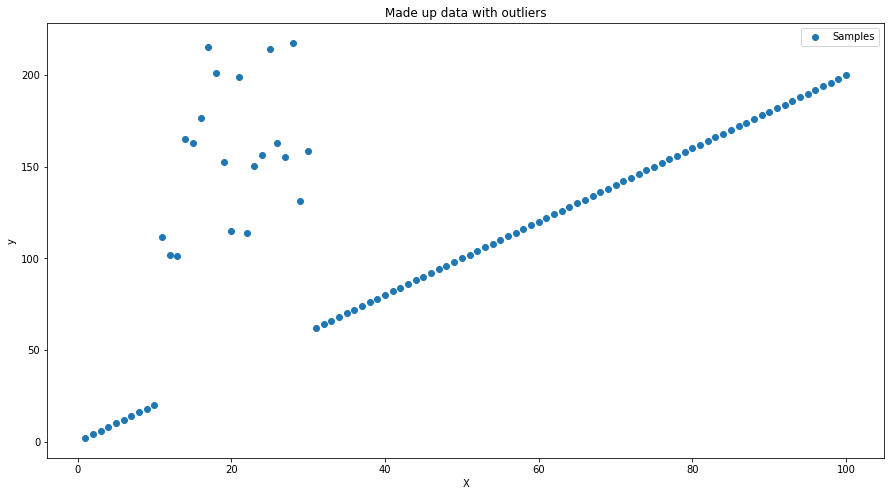

In [74]:
# visualizing data
def plot(clf=None, clf_name="", color=None):
    fig = plt.figure(figsize=(15, 8))
    plt.scatter(X, y, label="Samples")
    plt.title("Made up data with outliers")
    if clf is not None:
        y_pred = clf.predict(X)
        plt.plot(X, y_pred, label=clf_name, color=color)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
plot()

We can see there's some random perturbations in the begenning of the scatter plot. We'll see how OLS fits the data. 

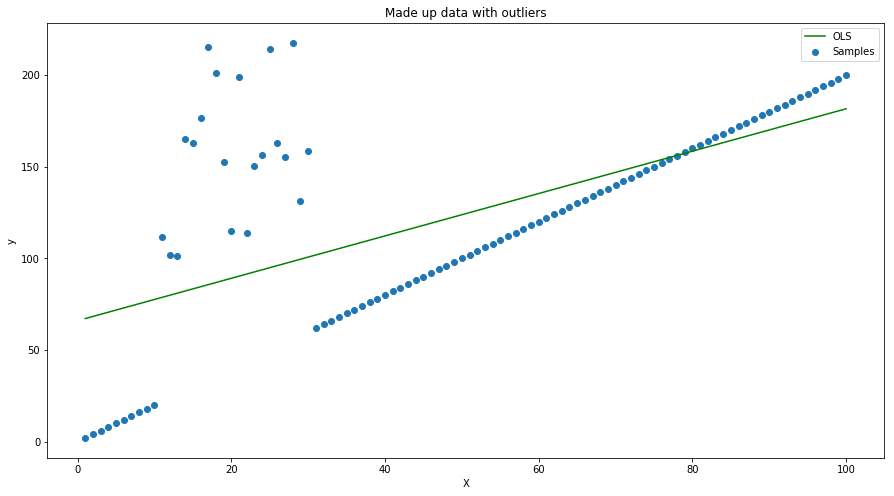

In [75]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)
plot(lr, "OLS", "green")

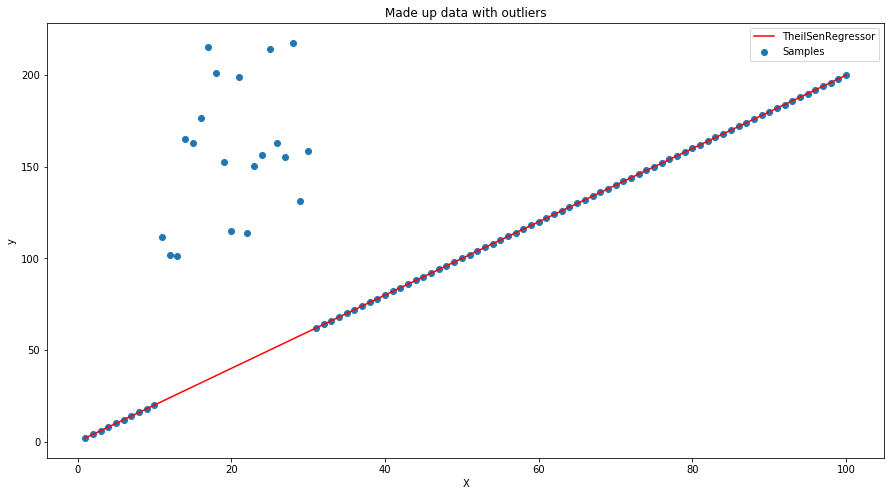

In [76]:
from sklearn.linear_model import TheilSenRegressor

tr = TheilSenRegressor().fit(X, y)
plot(tr, "TheilSenRegressor", "red")

As we can see TheilSen Regressor has done a better job than the OLS Regression. Hence, it is recommended to use whenever data has minor perturbations. Internally, it computes the line with every pair or points (O(n^2)) and takes the one with median slope. 